### Assignment 3
#### Jiaxu Han

#### 1. Simulation in Sociology, Moretti (2002)

In the paper, the author reviewed multiple simulation models that have been applied in or might make contributions to various fields of social science. Simulation has been playing a more and more important role in testing theories, making decisions, predicting social events, verifying point of stability and ect. However, each simulation model has its own weaknesses in terms of validity.  

For example, simulations of multiagent systems is to develop “ autonomous agents” working in complex, dynamic and often unpredictable environments and using micro-level interactions to simulate and predict macro social phenomena. Therefore, the quality of the simulation using multiagent system much relies on the modeling of each individual and formalizing social roles. Consequently, deviation of simulated individuals and formalized social roles from real people and their social roles in the real world might threaten the validity of the simulation model. In some simulation models that were applied in archaeology and anthropology, the definition of agents is based on the concept of bounded rationality that is much weaker than standard economic rationality, which provides a new perspective to construct sociological theories. Therefore, in order to improve the validity of the simulation models, the author suggested further research in using realistic and understandable models of rationality that can be applied in the case of limited knowledge, formalizing psychological theories and knowledge.  

Cellular automata can be viewed as a particular kind of multiagent system where the agents have a specific and determined position in a lattice and are homogeneous in their behavior and how they interact with each other. It can be used to verify if a system would progress to one point of stability where there are no longer state transitions. However, there are two limitations associated with this approach. The first one is that the model assumes that there is a “global clock” according to which all cells are updated simultaneously, which may not be found in real social processes. In real world, individuals may modify their attitudes and opinions at different moments. Another problem lies in the restrictions of spatial structures in which each individual interacts only with a subset of the whole population. The spatial restriction might be acceptable, but considering the increasing use of social media in many social processes nowadays, it is getting more and more difficult to define the neighborhood of a unit. 

Despite some limitations, the computer simulation is very important in modeling “dynamic feedback” where one variable elicits the change of another variable which in turn causes the further change in the first variable. The author cited a system dynamic model introduced by Forrester (1961) about the stall effects of global economic growth on the environment and in turn, the change of environment affects the growth of global economic.   

As for another example in political science that also deal with dynamic feedback, I would be interested in the dynamic relationship between an individual’s likelihood of voting and his/her expectation of whether his/her vote would make a difference. More specifically, it is hypothesized that if a voter is not very likely to vote due to a variety of reasons, he/she may lower the expectation that his/her vote would make a difference in the election result in order to rationalize his/her behavior of not going to vote. In turn, a voter’s decreasing expectation of his/her voting on the results would further decrease his/her likelihood of voting.


#### 2. Simulating your income

##### (a)

In [2]:
# Import initial packages
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

In [3]:
def sim_income(p):
    '''
    Requires a simulation profile, p, structured as a dictionary
    
    p = {
    'inc0'       : 80000,     #average initial value
    'yr_work'    : 40,        #years working after graduate
    'g'          : 0.025,     #growth rate of income
    'p'          : 0.4,       #persistence
    'num_sim'    : 10000,     #number of simulation
    'st_year'    : 2020,      #starting year
    'sd'         : 0.13       #standard deviation
   }
   
   '''
    np.random.seed(524)
    error = np.random.lognormal(0, p['sd'], (p['yr_work'], p['num_sim']))
    ln_life_income = np.zeros([p['yr_work'], p['num_sim']])
    ln_life_income[0,:] = np.log(p['inc0']) + np.log(error[0,:])
    year = np.arange(p['st_year'], p['st_year'] + p['yr_work'])
    
    for i in range(1, p['yr_work']):
        part_a = (1-p['p'])*(np.log(p['inc0']) + p['g']*(year[i]-2020)) 
        part_b = p['p']*(ln_life_income[i-1,:])+np.log(error[i,:])
        ln_life_income[i,:] = part_a + part_b
    
    
    life_income = np.exp(ln_life_income)
    
    return life_income

In [4]:
p1 = {
    'inc0'       : 80000,   
    'yr_work'    : 40,        
    'g'          : 0.025,     
    'p'          : 0.4,       
    'num_sim'    : 10000,     
    'st_year'    : 2020,      
    'sd'         : 0.13       
}

life_income = sim_income(p1)

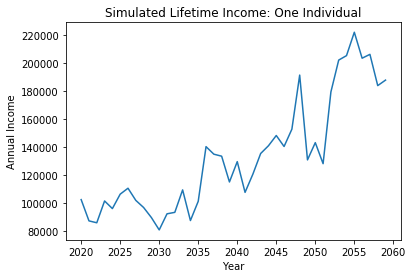

In [5]:
year = np.arange(p1['st_year'], p1['st_year'] + p1['yr_work'])
plt.plot(year, life_income[:,3])
plt.xlabel('Year')
plt.ylabel('Annual Income')
plt.title('Simulated Lifetime Income: One Individual')
plt.show()

#### (b)

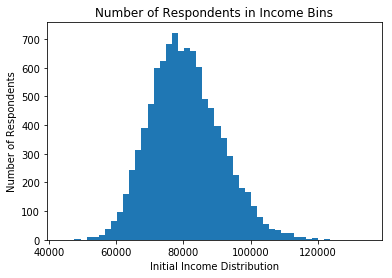

In [6]:
plt.hist(life_income[0,:], bins=50)
plt.xlabel("Initial Income Distribution")
plt.ylabel("Number of Respondents")
plt.title("Number of Respondents in Income Bins")
plt.show()

In [7]:
count1 = 0
count2 = 0
for i in range(p1['num_sim']):
    if life_income[0, i] > 100000:
        count1 += 1
    if life_income[0, i] < 70000:
        count2 += 1
print ('percent of the class will earn more than $100,000', count1/p1['num_sim'])
print ('percent of the class will earn less than $70,000', count2/p1['num_sim'])
    

percent of the class will earn more than $100,000 0.0417
percent of the class will earn less than $70,000 0.1512


(1) From above results, approximately 4.17 percents of the class will earn more than $100,000 in the first year out of the program.

(2) Approximately 15.12 percents of the class will earn less than $70000.

(3) Yes, according to the plot, the distribution is normally distributed.

#### (c)

In [8]:
def loan_payment(p, lifetime_income):
    '''
    Input:
        p: profile
        lifetime_income: a list of list that contains life time income
        for each simulated individual
    Output:
        years_payoff_loan: a list that contains years that would take
        to pay off loans for each individual
        percent: a float that represents how many percents of individuals
        can pay off student loan in 10 years
    '''
         
    years_payoff_loan = np.zeros(p['num_sim'])
    for i in range(p['num_sim']):
        loan = 95000
        for yr in range(p['yr_work']):
            loan = loan - 0.1*lifetime_income[yr, i]
            if loan <= 0:
                years_payoff_loan[i] = yr +1
                break

    count3 = 0
    for i in range(p['num_sim']):
        if years_payoff_loan[i] <= 10:
            count3 += 1

    return years_payoff_loan, count3/p['num_sim']
        

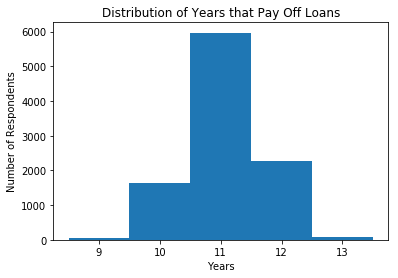

0.1678 percents of simulations will pay off loans in 10 years


In [9]:
years_payoff_loan, percentile = loan_payment(p1, life_income)
plt.hist(years_payoff_loan, bins = [8.5, 9.5, 10.5, 11.5, 12.5, 13.5])
plt.xlabel('Years')
plt.ylabel('Number of Respondents')
plt.title('Distribution of Years that Pay Off Loans')
plt.show()

print(percentile, 'percents of simulations will pay off loans in 10 years')

From the calculation above, we found that approximately 16.78% of the simulations are able to pay off the loan in 10 years.

#### (d)

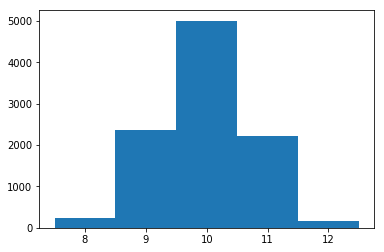

0.7602 percent of students will pay off loan in 10 years


In [10]:
p2 = {
    'inc0'       : 90000,   
    'yr_work'    : 40,        
    'g'          : 0.025,     
    'p'          : 0.4,       
    'num_sim'    : 10000,     
    'st_year'    : 2020,      
    'sd'         : 0.17       
}

life_income_2 = sim_income(p2)
yr_payoff_loan, per = loan_payment(p2, life_income_2)

plt.hist(yr_payoff_loan, bins = [7.5, 8.5, 9.5, 10.5, 11.5, 12.5])
plt.show()

print(per, 'percent of students will pay off loan in 10 years')

With the new starting salary and standard deviation, 76.02% of the simulations are able to pay off the loan in 10 years.